# 2ND ASSIGNMENT

In [1]:
# importing some essential libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

## Question 1 and 2

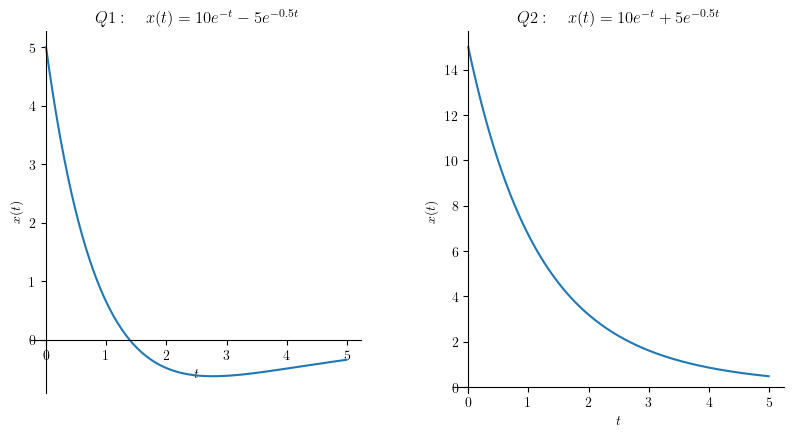

In [3]:

# defined time interval
t = np.arange(0,5,0.01)

# defining signals
x1 = 10*np.exp(-t) - 5*np.exp(-t/2)
x2 = 10*np.exp(-t) + 5*np.exp(-t/2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
fig.tight_layout(pad=4)
plt.rcParams.update({"text.usetex": True})
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

ax1 = plt.subplot(1,2,1)
ax1.plot(t,x1)
plt.title(' $Q1: \quad x(t)=10e^{-t}-5e^{-0.5t}$ ')

ax2 = plt.subplot(1,2,2)
ax2.plot(t,x2)
plt.title(' $Q2: \quad x(t)=10e^{-t}+5e^{-0.5t}$ ')

for ax in axes.flat:
    ax.set(xlabel='$t$', ylabel='$x(t)$')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')




## Question 3

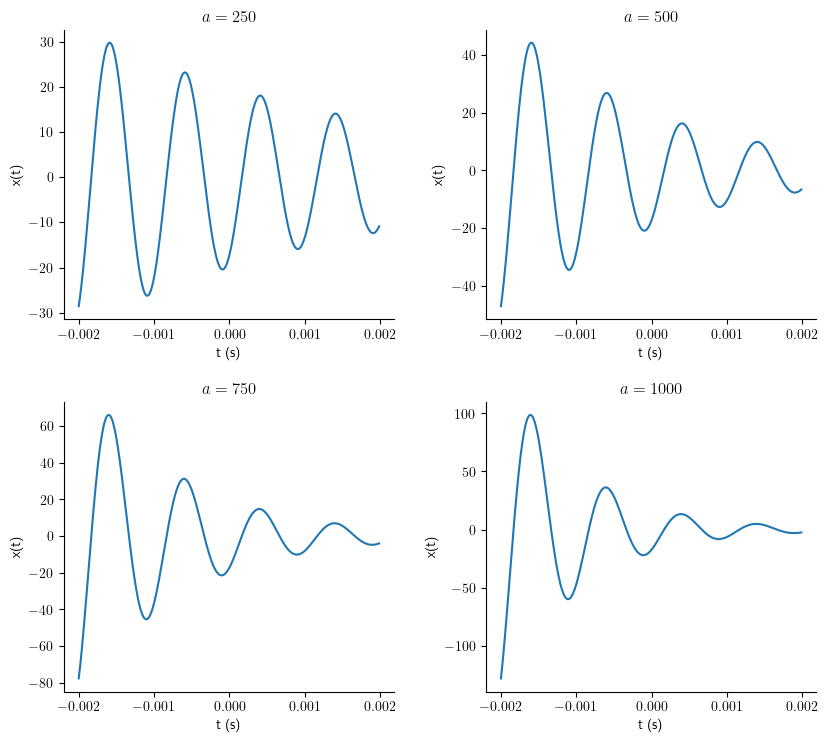

In [4]:

# time in seconds, with thousandth stepsize
t = np.arange(-0.002,0.002,0.00001)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
fig.tight_layout(pad=4)
plt.rcParams.update({"text.usetex": True})
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

# loop to output and plot given exponentially damped sinusoidal signal with four variations of a
a = 250
for i in range(1,5):
    x3 = 20*np.sin(2*np.pi*1000*t-(np.pi/3))*np.exp(-a*t)
    plt.subplot(2,2,i)
    plt.plot(t,x3)
    plt.title('$a = %i$' % a)
    plt.xlabel('t (s)')
    plt.ylabel('x(t)')
    a += 250
    


The signal given is an exponentially damped sinusoidal one:
$$x(t) = 20sin(2 \pi \times 1000t - \pi /3)e^{-at}$$

The signal is sinusoidal in appearance. but its value diminishes because of the exponentially decaying factor, $e^{-at}$. the variable $a$ is responsible for the strength of decay. increasing $a$ values increases the effect: working as a kind of time-scaling effect. But as a consequence its effect on the beginning portion of the signal is pronounced too.

The frequency of the signal is $f=1000Hz$. 
the phase shift is $\pi/3$.
the time-scaling factor on the sinusoidal signal is 20.
time is in milliseconds.

all of them viewed on the same plot:

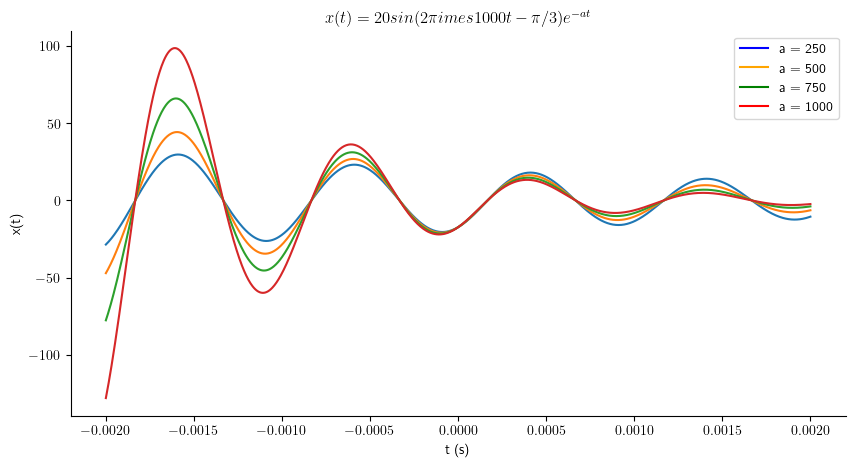

In [5]:
# plotting
t = np.linspace(-0.002,0.002,1000)

plt.figure(figsize=(10,5))
a = 250
for i in range(1,5):
    x3 = 20*np.sin(2*np.pi*1000*t-(np.pi/3))*np.exp(-a*t)
    plt.plot(t,x3)
    a += 250
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.title('$x(t) = 20sin(2 \pi \times 1000t - \pi /3)e^{-at}$')
plt.xlabel('t (s)')
plt.ylabel('x(t)')


# adding legend 
handles, labels = plt.gca().get_legend_handles_labels()

graph1 = Line2D([0], [0], label='a = 250', color='blue')
graph2 = Line2D([0], [0], label='a = 500', color='orange')
graph3 = Line2D([0], [0], label='a = 750', color='green')
graph4 = Line2D([0], [0], label='a = 1000', color='red')

handles.extend([graph1,graph2,graph3,graph4])

plt.legend(handles=handles)


plt.show()

## Question 4

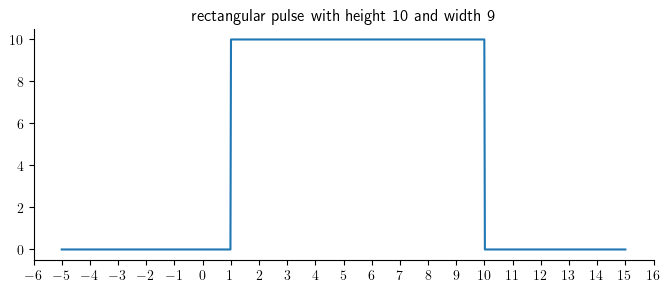

In [6]:
# rectangular pulse. defined using unit step/heaviside
def rect_pulse1(t, tau):
    return np.heaviside(t,1) - np.heaviside(t-tau,1)

# rectangular pulse. based on its definition
def rect_pulse2(t, tau):
    sig = []
    for i in range(len(t)):
        value = (10 if t[i]>=0 and t[i]<=tau else 0)
        sig.append(value)
    return sig

# plotting
t = np.linspace(-5,15,1000)
x_4 = rect_pulse2(t-1, 9)
plt.figure(figsize=(8,3))
plt.plot(t,x_4)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('rectangular pulse with height 10 and width 9')

plt.show()

## Question 5

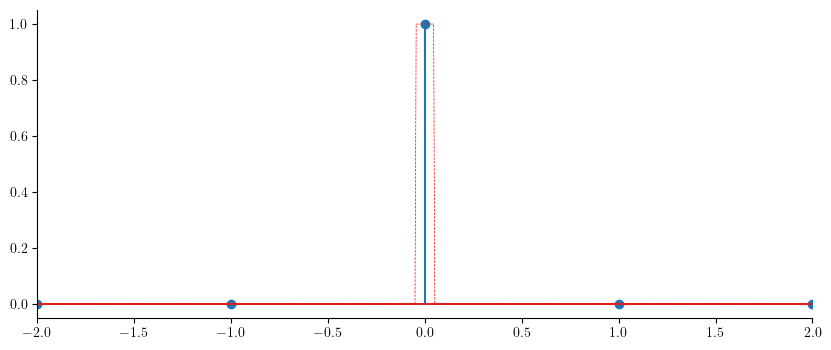

In [7]:
# defining signal
def y(n,F):
    signal = []
    for i in range(len(n)):
        if n[i]>= -0.5*F and n[i]<=0.5*F:
            value = np.cos(2*np.pi*F*n[i])
        else:
            value = 0
        signal.append(value)
    return signal

n = np.arange(-3,3).astype(float)
t = np.linspace(-3,3,1000)
F = 0.1
y_5n = y(n,F)
y_5t = y(t,F)

plt.figure(figsize=(10,4))
plt.stem(n,y_5n)
plt.plot(t,y_5t, 'r--', linewidth=0.5)
plt.xlim(-2,2)

plt.show()

the given piecewise signal is a cosine function in the interval $-0.5F \leq n \leq 0.5F$. With $F$ being a small value the interval reduces to $0.05 \leq n \leq 0.05$. then considering the signal is discrete that accepts integer inputs only, the signal will appear as a unit impulse, with a singular value of $1$ at $y[0]$.

Note: the dashed red graph is its continuous time-counterpart

## Question 6

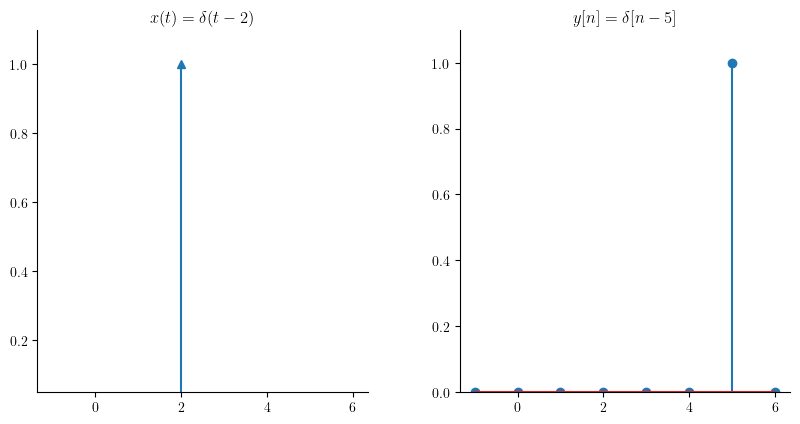

In [8]:
# unit impulse def1
def impulse(t, pos):
    return np.where(t == -pos, 1, 0)

# unit impulse def2
def impulse2(t, pos):
    signal = []
    for i in range(len(t)):
        value = (1 if t[i]==-pos else 0)
        signal.append(value)
    return signal


# defining signals
n = np.arange(-1,7).astype(float)

x_6t = impulse(n, -2)
y_6n = impulse(n, -5)


# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
fig.tight_layout(pad=4)
plt.rcParams.update({"text.usetex": True})
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

ax1 = plt.subplot(1,2,1)
plt.stem(n, x_6t, markerfmt='^', basefmt=' ')
plt.ylim(0.05,1.1)
plt.title(' $x(t)=\delta(t-2)$ ')

ax2 = plt.subplot(1,2,2)
ax2.stem(n,y_6n)
plt.ylim(0,1.1)
plt.title(' $y[n]=\delta[n-5]$ ')

plt.show()

The continuous-time unit impulse function $\delta(t)$ and the discrete-time unit impulse function $\delta[n]$ are visually similar. time shifted unit impulse functions are given in the question

## Question 7

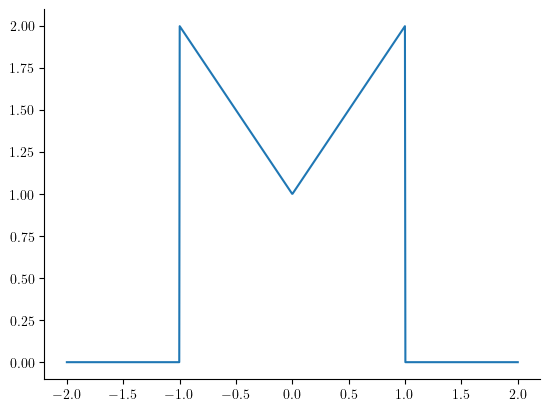

In [9]:
# defining signal
def x_7(t):
    signal = []
    for i in range(len(t)):
        if t[i] >= -1 and t[i] < 0:
            value = -t[i]+1
        elif t[i] >= 0 and t[i] <= 1:
            value = t[i]+1
        else:
            value = 0
        signal.append(value)
    return signal

# plotting signal
t = np.linspace(-2,2,1000)
x = x_7(t)
plt.plot(t,x)
plt.show()

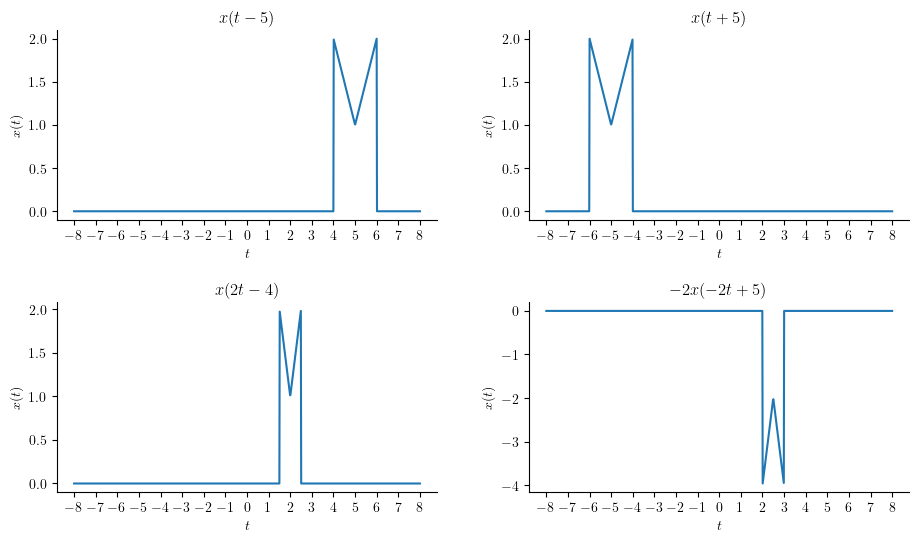

In [10]:
# defined time interval
t = np.linspace(-8,8,1000)

# defining transformed signals
x_7a = x_7(t-5)
x_7b = x_7(t+5)
x_7c = x_7(2*t-4)
x_7d = -2*np.array(x_7(-2*t+5))

# plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.tight_layout(pad=4)
plt.rcParams.update({"text.usetex": True})
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
for ax in axes.flat:
    ax.set(xlabel='$t$', ylabel='$x(t)$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax1 = plt.subplot(2,2,1)
ax1.plot(t,x_7a)
plt.title(' $x(t-5)$ ')

ax2 = plt.subplot(2,2,2)
ax2.plot(t,x_7b)
plt.title(' $x(t+5)$ ')

ax3 = plt.subplot(2,2,3)
ax3.plot(t,x_7c)
plt.title(' $x(2t-4)$ ')

ax4 = plt.subplot(2,2,4)
ax4.plot(t,x_7d)
plt.title(' $-2x(-2t+5)$ ')

plt.show()

$x(t-5)$ is time-shifted to the right, $x(t+5)$ to the left by $5$ units

$x(2t-4)$ is first time scaled by being squeezed in half, then time shifted $4/2=2$ units to the right

$-2x(-2t+5)$ is reflected across y-axis, scaled in half, then shifted to the left by $5/2=2.5$, then doubly stretched vertically and inverted across the x-axis.


---

all files available at: https://github.com/az-yugen/EEE-3005.-Signals-Systems-LAB

---